In [ ]:
#Description : this program attemps to optimize a users portfolio using the Efficient Frontier



In [53]:
#Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [54]:
#Get the stock symbols/ tickers in the portfolio
#FAANG 

assets = ['BVT.JO', 'BTI.JO', 'CFR.JO', 'IMP.JO', 'SUR.JO', 'ADI.JO', 'APN.JO', 'CLH.JO', 'IPF.JO', 'ITE.JO', 'MTH.JO', 'PPE.JO', 'RMH.JO', 'S32.JO', 'SSS.JO', 'AIL.JO','MST.JO']

In [ ]:
# #Get the stock symbols/ tickers in the portfolio
# #FAANG 

# assets = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG', ]

In [55]:
#Assign weights to the stocks.
weights = np.array([0.056, 0.056, 0.056, 0.056, 0.056, 0.056, 0.056, 0.056, 0.056, 0.056, 0.056, 0.056, 0.057, 0.056, 0.056, 0.056, 0.056]) #20 percent each

In [ ]:
# #Assign weights to the stocks.
# weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2]) #20 percent each

In [56]:
#Get the stock/portfolio starting date
stockStartDate = '2012-01-01'

In [57]:
#Get the stock stocks ending date (date)
today = datetime.today().strftime('%Y-%m-%d')
today

'2021-04-19'

In [58]:
#create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

#Store the adjusted close price of the stock into df 
for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo', start = stockStartDate, end = today)['Adj Close']

In [59]:
#Show the df
df

,BVT.JO,BTI.JO,CFR.JO,IMP.JO,SUR.JO,ADI.JO,APN.JO,CLH.JO,IPF.JO,ITE.JO,MTH.JO,PPE.JO,RMH.JO,S32.JO,SSS.JO,AIL.JO,MST.JO
Date,,,,,,,,,,,,,,,,,
2012-01-02,2189.546387,27919.052734,3427.064697,15150.517578,991.839478,87.037827,9050.896484,1213.786377,519.867371,343.437317,NaN,24.662146,1.726872e-08,NaN,NaN,NaN,413.115265
2012-01-03,2242.163818,28028.988281,3582.573242,15356.024414,979.204468,83.521149,9277.450195,1215.370972,519.867371,343.437317,NaN,24.662146,1.750908e-08,NaN,NaN,NaN,427.869446
2012-01-04,2246.124512,28174.589844,3572.486328,15480.958008,979.204468,83.521149,9256.854492,1220.124634,548.979980,343.437317,NaN,23.811729,1.761661e-08,NaN,NaN,NaN,416.803833
2012-01-05,2263.097412,27998.406250,3548.109131,15435.692383,979.204468,77.366959,9268.087891,1212.359985,548.979980,343.437317,NaN,23.811729,1.778742e-08,NaN,NaN,NaN,416.066132
2012-01-06,2304.257812,27850.617188,3530.456787,15664.739258,979.204468,73.850296,9394.471680,1213.786377,548.979980,343.437317,NaN,23.811729,1.801513e-08,NaN,NaN,NaN,414.590668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-12,17340.000000,56004.000000,14546.000000,27500.000000,2100.000000,640.000000,14799.000000,423.000000,964.806824,1631.000000,9300.0,107.000000,1.900000e+02,3185.0,1332.0,409.0,974.000000
2021-04-13,17307.000000,55732.000000,14748.000000,27795.000000,2100.000000,650.000000,14714.000000,414.000000,950.477966,1664.000000,9531.0,112.000000,1.950000e+02,3177.0,1324.0,409.0,962.000000
2021-04-14,17618.000000,55047.000000,15102.000000,27365.000000,2160.000000,650.000000,14600.000000,425.000000,965.000000,1679.000000,9846.0,120.000000,1.960000e+02,3197.0,1365.0,410.0,975.000000


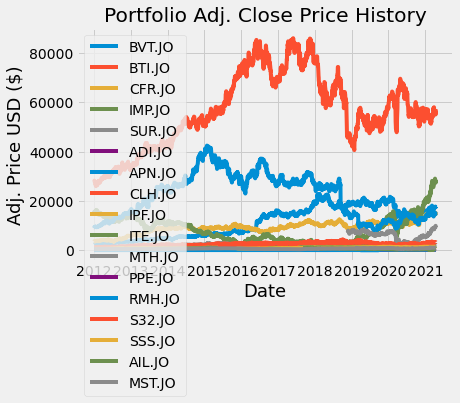

In [60]:
# visually show the stock / portfolio
title = 'Portfolio Adj. Close Price History'

#Get the stocks
my_stocks = df

#Create and plot the graph
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label = c)
    
plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Price USD ($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc= 'upper left')
plt.show()

In [61]:
#Show the daily simply return
returns = df.pct_change()
returns

,BVT.JO,BTI.JO,CFR.JO,IMP.JO,SUR.JO,ADI.JO,APN.JO,CLH.JO,IPF.JO,ITE.JO,MTH.JO,PPE.JO,RMH.JO,S32.JO,SSS.JO,AIL.JO,MST.JO
Date,,,,,,,,,,,,,,,,,
2012-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03,0.024031,0.003938,0.045377,0.013564,-0.012739,-0.040404,0.025031,0.001305,0.000000,0.000000,NaN,0.000000,0.013919,NaN,NaN,NaN,0.035714
2012-01-04,0.001766,0.005195,-0.002816,0.008136,0.000000,0.000000,-0.002220,0.003911,0.056000,0.000000,NaN,-0.034483,0.006141,NaN,NaN,NaN,-0.025862
2012-01-05,0.007557,-0.006253,-0.006824,-0.002924,0.000000,-0.073684,0.001214,-0.006364,0.000000,0.000000,NaN,0.000000,0.009696,NaN,NaN,NaN,-0.001770
2012-01-06,0.018188,-0.005278,-0.004975,0.014839,0.000000,-0.045454,0.013636,0.001177,0.000000,0.000000,NaN,0.000000,0.012802,NaN,NaN,NaN,-0.003546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-12,-0.004307,0.001251,-0.007099,-0.026962,-0.036255,0.000000,-0.009835,-0.004706,-0.001976,-0.034911,0.010979,0.000000,0.043956,-0.012709,-0.024176,-0.007282,0.010373
2021-04-13,-0.001903,-0.004857,0.013887,0.010727,0.000000,0.015625,-0.005744,-0.021277,-0.014852,0.020233,0.024839,0.046729,0.026316,-0.002512,-0.006006,0.000000,-0.012320
2021-04-14,0.017970,-0.012291,0.024003,-0.015470,0.028571,0.000000,-0.007748,0.026570,0.015279,0.009014,0.033050,0.071429,0.005128,0.006295,0.030967,0.002445,0.013514


In [62]:
#Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,BVT.JO,BTI.JO,CFR.JO,IMP.JO,SUR.JO,ADI.JO,APN.JO,CLH.JO,IPF.JO,ITE.JO,MTH.JO,PPE.JO,RMH.JO,S32.JO,SSS.JO,AIL.JO,MST.JO
BVT.JO,0.085644,0.002974,0.012838,0.028653,0.009157,0.008124,0.029836,0.024369,0.022377,0.004100,0.097575,0.011528,0.039832,-0.464746,0.020676,-1.059549,0.005004
BTI.JO,0.002974,0.054157,0.018947,0.006435,0.003779,0.001844,0.009100,0.007334,0.001946,-0.001795,-0.004567,-0.005907,0.012657,0.088335,0.000821,0.282897,0.004438
CFR.JO,0.012838,0.018947,0.065905,0.028541,0.006181,0.005034,0.012092,0.011822,0.007406,0.004373,0.053330,0.003065,-0.029908,-0.506586,0.009288,-1.727368,0.005573
IMP.JO,0.028653,0.006435,0.028541,0.276553,0.016281,0.008192,0.023353,0.036246,0.020813,0.001125,0.150789,0.011282,-0.067373,-0.311166,0.026058,-0.432435,0.007957
SUR.JO,0.009157,0.003779,0.006181,0.016281,0.108676,0.008141,0.003423,0.020048,0.007816,0.002075,0.053147,0.005715,-0.066852,-0.603283,0.008736,-0.823256,0.004544
ADI.JO,0.008124,0.001844,0.005034,0.008192,0.008141,0.306059,0.006225,0.007572,0.007780,0.006459,0.029954,-0.009525,0.299516,0.076467,0.000709,0.835039,0.000988
APN.JO,0.029836,0.009100,0.012092,0.023353,0.003423,0.006225,0.115174,0.015926,0.013219,0.003568,0.066571,0.010631,0.052120,-0.242882,0.014973,-0.505133,0.002974
CLH.JO,0.024369,0.007334,0.011822,0.036246,0.020048,0.007572,0.015926,0.176750,0.023776,0.008022,0.129492,0.015707,-0.019172,-0.454373,0.015306,-0.674765,0.003176
IPF.JO,0.022377,0.001946,0.007406,0.020813,0.007816,0.007780,0.013219,0.023776,0.098736,0.007204,0.099206,-0.001525,0.032913,-0.583453,0.022689,-0.999100,0.003229
ITE.JO,0.004100,-0.001795,0.004373,0.001125,0.002075,0.006459,0.003568,0.008022,0.007204,0.107569,0.010231,0.004213,0.026428,0.298995,0.004371,0.259129,0.001097


In [63]:
#Create the portfol variance
port_variance = np.dot( weights.T, np.dot(cov_matrix_annual, weights))
port_variance

50.04128550237482

In [64]:
#Calculate the portfolio volatility aka standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

7.073986535354362

In [65]:
#Calculate the annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

5.584321412998588

In [66]:
#Show the expected annual return, volatility (risk), and variance

percent_var = str( round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100 ) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2) * 100) + '%'

print('Expected annual return: '+ percent_ret)
print('Annual volatility / risk: '+ percent_vols)
print('Annual variance: '+  percent_var)

Expected annual return: 558.0%
Annual volatility / risk: 707.0%
Annual variance: 5004.0%


In [24]:
pip install PyPortfolioOpt

Note: you may need to restart the kernel to use updated packages.


In [67]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [68]:
#Portfolio Optimization !

#Calculate the expected returns and the annualised sample covariance matrixof asset returns
mu = expected_returns.mean_historical_return(df)
s = risk_models.sample_cov(df)


#Optimize for max sharpe ratio 
ef = EfficientFrontier(mu, s)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)


OrderedDict([('BVT.JO', 0.26507), ('BTI.JO', 0.05799), ('CFR.JO', 0.19843), ('IMP.JO', 0.0), ('SUR.JO', 0.02639), ('ADI.JO', 0.0699), ('APN.JO', 0.0), ('CLH.JO', 0.0), ('IPF.JO', 0.0), ('ITE.JO', 0.17511), ('MTH.JO', 0.0), ('PPE.JO', 0.03842), ('RMH.JO', 0.01047), ('S32.JO', 0.0), ('SSS.JO', 0.11318), ('AIL.JO', 0.0), ('MST.JO', 0.04498)])
Expected annual return: 29.3%
Annual volatility: 19.1%
Sharpe Ratio: 1.43


(0.292875431921255, 0.1907212962719587, 1.4307549143969152)

In [ ]:
#Highlight total  copy and paste and must add to 1 



In [70]:
#Get the discrete alloacation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 100000)


allocation , leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds remaining: R{:.2f}'.format(leftover))

Discrete allocation: {'BVT.JO': 2, 'CFR.JO': 1, 'SUR.JO': 2, 'ADI.JO': 11, 'ITE.JO': 10, 'PPE.JO': 31, 'RMH.JO': 6, 'SSS.JO': 8, 'MST.JO': 5}
Funds remaining: R31.00
